# Goal

* Analyze results from `microDivBetaDiv` simulation

# Var

In [1]:
workDir = '/ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/microBetaDiv/'

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)

as.Num = function(x) x %>% as.character %>% as.numeric


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
# classifying true positives, neg, ...
clsfy = function(guess,known){
    if(is.na(guess) | is.na(known)){
        return(NA)
        }
    if(guess == TRUE){
        if(guess == known){
            return('True positive')
            } else {
            return('False positive')
            }
        } else
    if(guess == FALSE){
        if(guess == known){
            return('True negative')
            } else {
            return('False negative')
            }
        } else {
        stop('Error: true or false needed')
        }
    }

# Load

## True BD shift

In [8]:
BDshift_files = list.files(path=workDir, pattern='BD-shift_stats.txt', full.names=TRUE, recursive=TRUE)
BDshift_files %>% length %>% print

[1] 250


In [9]:
df_shift = list()
for(F in BDshift_files){
    tmp = read.delim(F, sep='\t') 
    FF = strsplit(F, '/') %>% unlist
    FFl = length(FF)
    tmp$shared_perc = FF[FFl-3]
    tmp$perm_perc = FF[FFl-2]
    tmp$rep = FF[FFl-1]
    tmp$file = FF[FFl]
    df_shift[[F]] = tmp
}

df_shift = do.call(rbind, df_shift)
rownames(df_shift) = 1:nrow(df_shift)

df_shift = df_shift %>%
    filter(library %in% c(2,4,6)) %>%
    group_by(taxon, shared_perc, perm_perc, rep) %>%
    summarize(median = median(median)) %>%
    ungroup() %>%
    rename('median_true_BD_shift' = median) 

# status
df_shift %>% nrow %>% print
df_shift %>% head(n=3)

[1] 265350


,taxon,shared_perc,perm_perc,rep,median_true_BD_shift
1,Acaryochloris_marina_MBIC11017,100,0,1,0
2,Acaryochloris_marina_MBIC11017,100,0,10,0.018
3,Acaryochloris_marina_MBIC11017,100,0,5,0


## MW-HR-SIP incorp calls

* filtering BD shift estimates to just incorporators identified by MW-HR-SIP

In [10]:
incorp_files = list.files(path=workDir, pattern='OTU_abs1e9_PCR_sub_filt_MW_DESeq2_incorp.txt', full.names=TRUE, recursive=TRUE)
incorp_files %>% length %>% print

[1] 250


In [11]:
df_incorp = list()
for(F in incorp_files){
    tmp = read.delim(F, sep='\t') 
    FF = strsplit(F, '/') %>% unlist
    FFl = length(FF)
    tmp$shared_perc = FF[FFl-3]
    tmp$perm_perc = FF[FFl-2]
    tmp$rep = FF[FFl-1]
    tmp$file = FF[FFl]
    df_incorp[[F]] = tmp
}

df_incorp = do.call(rbind, df_incorp)
rownames(df_incorp) = 1:nrow(df_incorp)
df_incorp %>% head(n=3) %>% print

   baseMean log2FoldChange     lfcSE        stat    pvalue      padj         p
1 13.674666    -0.02547406 0.4777845 -0.05331704 0.9574793 0.9992571 0.7178835
2  1.861617     0.03522613 0.4916922  0.07164263 0.9428863 0.9992571 0.6688738
3  6.776217    -0.25902825 0.4370477 -0.59267732 0.5533971 0.9992571 0.8779292
  occur_all occur_heavy heavy_BD_min heavy_BD_max
1       0.5           0          1.7         1.73
2       0.5           0          1.7         1.73
3       0.5           0          1.7         1.73
                                 taxon incorp shared_perc perm_perc rep
1       Acetobacterium_woodii_DSM_1030  FALSE         100         0   1
2         Acholeplasma_laidlawii_PG-8A  FALSE         100         0   1
3 Acidaminococcus_fermentans_DSM_20731  FALSE         100         0   1
                                          file
1 OTU_abs1e9_PCR_sub_filt_MW_DESeq2_incorp.txt
2 OTU_abs1e9_PCR_sub_filt_MW_DESeq2_incorp.txt
3 OTU_abs1e9_PCR_sub_filt_MW_DESeq2_incorp.txt


In [12]:
# just incorporators
df_incorp = df_incorp %>%
    filter(incorp == TRUE) %>%
    dplyr::distinct(taxon, incorp, shared_perc, perm_perc, rep) %>%
    rename('HWHRSIP_incorp' = incorp)

df_incorp %>% nrow %>% print
df_incorp %>% head(n=3) %>% print

[1] 31978
                                   taxon HWHRSIP_incorp shared_perc perm_perc
1 Campylobacter_insulaenigrae_NCTC_12927           TRUE         100         0
2   Acidobacterium_capsulatum_ATCC_51196           TRUE         100         0
3           Agrobacterium_fabrum_str_C58           TRUE         100         0
  rep
1   1
2   1
3   1


## q-SIP

In [23]:
atomX_files = list.files(path=workDir, pattern='*_qSIP_atom.txt', full.names=TRUE, recursive=TRUE)
atomX_files %>% length %>% print

[1] 250


In [24]:
df_atomX = list()
for(F in atomX_files){
    tmp = read.delim(F, sep='\t') 
    FF = strsplit(F, '/') %>% unlist
    FFl = length(FF)
    tmp$shared_perc = FF[FFl-3]
    tmp$perm_perc = FF[FFl-2]
    tmp$rep = FF[FFl-1]
    tmp$file = FF[FFl]
    df_atomX[[F]] = tmp
}

df_atomX = do.call(rbind, df_atomX)
rownames(df_atomX) = 1:nrow(df_atomX)
df_atomX %>% head(n=3) %>% print

                                 taxon  control treatment      BD_diff
1       Acaryochloris_marina_MBIC11017 1.722028  1.708890 -0.013138045
2 Acetobacter_pasteurianus_IFO_3283-03 1.710307  1.712948  0.002640978
3       Acetobacterium_woodii_DSM_1030 1.704576  1.703236 -0.001340461
  control_GC control_MW treatment_max_MW treatment_MW atom_fraction_excess
1  0.9097708   308.1422         317.6631     305.7913          -0.24418197
2  0.7694042   308.0726         317.6635     308.5483           0.04904946
3  0.7007802   308.0386         317.6637     307.7963          -0.02488779
   atom_CI_low atom_CI_high shared_perc perm_perc rep
1 -0.600857174   0.10884380         100         0   1
2 -0.004524922   0.09510114         100         0   1
3 -0.039247999  -0.01162916         100         0   1
                              file
1 OTU_abs1e9_PCR_sub_qSIP_atom.txt
2 OTU_abs1e9_PCR_sub_qSIP_atom.txt
3 OTU_abs1e9_PCR_sub_qSIP_atom.txt


### Joining estimate with true values

In [25]:
# table join
df_atomX %>% nrow %>% print

df_atomX_j = left_join(df_atomX, df_shift, c('taxon' = 'taxon',
                                             'shared_perc'='shared_perc',
                                             'perm_perc'='perm_perc',
                                             'rep'='rep')) %>%
   filter(!is.na(BD_diff)) %>%
   mutate(true_incorporator = ifelse(median_true_BD_shift > 0.002, TRUE, FALSE),
          true_atom_fraction_excess = median_true_BD_shift / 0.036,
          atom_fraction_excess = ifelse(is.na(atom_CI_low), 0, atom_fraction_excess))

df_atomX_j %>% nrow %>% print
df_atomX_j %>% head(n=3) %>% print

[1] 276200


Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factors with different levels, coercing to character vector”

[1] 203945
                                 taxon  control treatment      BD_diff
1       Acaryochloris_marina_MBIC11017 1.722028  1.708890 -0.013138045
2 Acetobacter_pasteurianus_IFO_3283-03 1.710307  1.712948  0.002640978
3       Acetobacterium_woodii_DSM_1030 1.704576  1.703236 -0.001340461
  control_GC control_MW treatment_max_MW treatment_MW atom_fraction_excess
1  0.9097708   308.1422         317.6631     305.7913          -0.24418197
2  0.7694042   308.0726         317.6635     308.5483           0.04904946
3  0.7007802   308.0386         317.6637     307.7963          -0.02488779
   atom_CI_low atom_CI_high shared_perc perm_perc rep
1 -0.600857174   0.10884380         100         0   1
2 -0.004524922   0.09510114         100         0   1
3 -0.039247999  -0.01162916         100         0   1
                              file median_true_BD_shift true_incorporator
1 OTU_abs1e9_PCR_sub_qSIP_atom.txt                    0             FALSE
2 OTU_abs1e9_PCR_sub_qSIP_atom.txt       

In [27]:
df_atomX_j$true_incorporator %>% summary

   Mode   FALSE    TRUE    NA's 
logical  183676   20269       0 

### Joining with MW-HR-SIP

In [28]:
df_atomX_j = left_join(df_atomX_j, df_incorp, c('taxon' = 'taxon',
                                        'shared_perc'='shared_perc',
                                        'perm_perc'='perm_perc',
                                        'rep'='rep')) %>%
    mutate(HWHRSIP_incorp = ifelse(is.na(HWHRSIP_incorp), FALSE, TRUE))

df_atomX_j %>% nrow %>% print
df_atomX_j %>% head(n=3) %>% print

Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factor and character vector, coercing into character vector”

[1] 203945
                                 taxon  control treatment      BD_diff
1       Acaryochloris_marina_MBIC11017 1.722028  1.708890 -0.013138045
2 Acetobacter_pasteurianus_IFO_3283-03 1.710307  1.712948  0.002640978
3       Acetobacterium_woodii_DSM_1030 1.704576  1.703236 -0.001340461
  control_GC control_MW treatment_max_MW treatment_MW atom_fraction_excess
1  0.9097708   308.1422         317.6631     305.7913          -0.24418197
2  0.7694042   308.0726         317.6635     308.5483           0.04904946
3  0.7007802   308.0386         317.6637     307.7963          -0.02488779
   atom_CI_low atom_CI_high shared_perc perm_perc rep
1 -0.600857174   0.10884380         100         0   1
2 -0.004524922   0.09510114         100         0   1
3 -0.039247999  -0.01162916         100         0   1
                              file median_true_BD_shift true_incorporator
1 OTU_abs1e9_PCR_sub_qSIP_atom.txt                    0             FALSE
2 OTU_abs1e9_PCR_sub_qSIP_atom.txt       

## delta BD

In [29]:
dBD_files = list.files(path=workDir, pattern='*_dBD.txt', full.names=TRUE, recursive=TRUE)
dBD_files %>% length %>% print

[1] 250


In [30]:
df_dBD = list()
for(F in dBD_files){
    tmp = read.delim(F, sep='\t') 
    FF = strsplit(F, '/') %>% unlist
    FFl = length(FF)
    tmp$shared_perc = FF[FFl-3]
    tmp$perm_perc = FF[FFl-2]
    tmp$rep = FF[FFl-1]
    tmp$file = FF[FFl]
    df_dBD[[F]] = tmp
}

df_dBD = do.call(rbind, df_dBD)
rownames(df_dBD) = 1:nrow(df_dBD)
df_dBD %>% head(n=3) %>% print

                                 taxon mean_CM_control mean_CM_treatment
1       Acaryochloris_marina_MBIC11017        1.729906          1.706919
2 Acetobacter_pasteurianus_IFO_3283-03        1.721156          1.721987
3       Acetobacterium_woodii_DSM_1030        1.714703          1.709346
  stdev_CM_control stdev_CM_treatment      delta_BD shared_perc perm_perc rep
1      0.020665026       0.0021992188 -0.0229868245         100         0   1
2      0.002170362       0.0092936484  0.0008304907         100         0   1
3      0.001507780       0.0005208017 -0.0053571403         100         0   1
                        file
1 OTU_abs1e9_PCR_sub_dBD.txt
2 OTU_abs1e9_PCR_sub_dBD.txt
3 OTU_abs1e9_PCR_sub_dBD.txt


### Joining estimate with truth

In [31]:
df_dBD_j = inner_join(df_dBD, df_shift, c('taxon' = 'taxon',
                                       'shared_perc'='shared_perc',
                                       'perm_perc'='perm_perc',
                                       'rep'='rep')) %>%
    filter(!is.na(delta_BD)) %>%
    mutate(true_incorporator = ifelse(median_true_BD_shift > 0.002, TRUE, FALSE),
           true_atom_fraction_excess = median_true_BD_shift / 0.036,
           atom_fraction_excess = delta_BD / 0.036)
df_dBD_j %>% head(n=3)

Warning message in inner_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factors with different levels, coercing to character vector”

,taxon,mean_CM_control,mean_CM_treatment,stdev_CM_control,stdev_CM_treatment,delta_BD,shared_perc,perm_perc,rep,file,median_true_BD_shift,true_incorporator,true_atom_fraction_excess,atom_fraction_excess
1,Acaryochloris_marina_MBIC11017,1.729906072,1.7069192475,0.0206650261538,0.00219921880986,-0.0229868244981,100,0,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,-0.638522902725
2,Acetobacter_pasteurianus_IFO_3283-03,1.72115641726,1.72198690793,0.00217036246995,0.00929364841039,0.000830490670569,100,0,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,0.0230691852935833
3,Acetobacterium_woodii_DSM_1030,1.71470324574,1.70934610548,0.00150778021095,0.000520801727452,-0.00535714026073,100,0,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,-0.148809451686944


### Joining with MW-HR-SIP results

In [32]:
df_dBD_j = left_join(df_dBD_j, df_incorp, c('taxon' = 'taxon',
                                        'shared_perc'='shared_perc',
                                        'perm_perc'='perm_perc',
                                        'rep'='rep')) %>%
    mutate(HWHRSIP_incorp = ifelse(is.na(HWHRSIP_incorp), FALSE, TRUE))

df_dBD_j %>% nrow %>% print
df_dBD_j %>% head(n=3)

Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factor and character vector, coercing into character vector”

[1] 265350


,taxon,mean_CM_control,mean_CM_treatment,stdev_CM_control,stdev_CM_treatment,delta_BD,shared_perc,perm_perc,rep,file,median_true_BD_shift,true_incorporator,true_atom_fraction_excess,atom_fraction_excess,HWHRSIP_incorp
1,Acaryochloris_marina_MBIC11017,1.729906072,1.7069192475,0.0206650261538,0.00219921880986,-0.0229868244981,100,0,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,-0.638522902725,FALSE
2,Acetobacter_pasteurianus_IFO_3283-03,1.72115641726,1.72198690793,0.00217036246995,0.00929364841039,0.000830490670569,100,0,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,0.0230691852935833,FALSE
3,Acetobacterium_woodii_DSM_1030,1.71470324574,1.70934610548,0.00150778021095,0.000520801727452,-0.00535714026073,100,0,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,-0.148809451686944,FALSE


# Truth versus estimate

## Calc

### Just true incorporators

In [33]:
# q-SIP
df_atomX_j_true = df_atomX_j %>%
    filter(true_incorporator == TRUE) %>%         # just incorporators identified by q-SIP
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100) %>%
    group_by(shared_perc, perm_perc, true_incorporator) %>%
    summarize(mean_delta_excess = mean(delta_excess),
              sd_delta_excess = sd(delta_excess)) %>%
    ungroup() %>%
    mutate(shared_perc = shared_perc %>% reorder(shared_perc %>% as.numeric),
           perm_perc = perm_perc %>% reorder(perm_perc %>% as.numeric),
           method = 'q-SIP')

df_atomX_j_true %>% head(n=3)

,shared_perc,perm_perc,true_incorporator,mean_delta_excess,sd_delta_excess,method
1,100,0,TRUE,-17.5650055755389,8.49872462092832,q-SIP
2,100,10,TRUE,-18.9475336298531,10.4754277123231,q-SIP
3,100,15,TRUE,-17.8768179415837,8.73702487874326,q-SIP


In [34]:
# delta-BD
df_dBD_j_true = df_dBD_j %>%
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100) %>%
    filter(true_incorporator == TRUE) %>%
    group_by(shared_perc, perm_perc, true_incorporator) %>%
    summarize(mean_delta_excess = mean(delta_excess),
              sd_delta_excess = sd(delta_excess)) %>%
    ungroup() %>%
    mutate(shared_perc = shared_perc %>% reorder(shared_perc %>% as.numeric),
           perm_perc = perm_perc %>% reorder(perm_perc %>% as.numeric),
           method = 'delta BD')

df_dBD_j_true %>% head(n=3)

,shared_perc,perm_perc,true_incorporator,mean_delta_excess,sd_delta_excess,method
1,100,0,TRUE,-2.38952088286562,23.0131048656348,delta BD
2,100,10,TRUE,-3.01281094683482,23.5401334489354,delta BD
3,100,15,TRUE,-3.78190801104828,21.7366484054216,delta BD


#### Plotting results

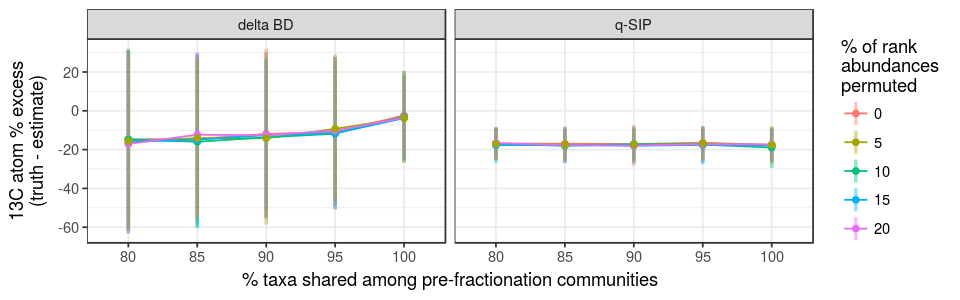

In [35]:
# plotting
tmp = rbind(df_atomX_j_true, df_dBD_j_true)

options(repr.plot.width=8, repr.plot.height=2.5)
p_BDshift_true = ggplot(tmp, aes(shared_perc, mean_delta_excess, 
                      color=perm_perc, group=perm_perc,
                      ymin=mean_delta_excess-sd_delta_excess,
                     ymax=mean_delta_excess+sd_delta_excess)) +
    geom_line() +
    geom_linerange(alpha=0.4, size=1) +    
    geom_point() +
    scale_color_discrete('% of rank\nabundances\npermuted') +
    facet_grid(. ~ method) +
    labs(x='% taxa shared among pre-fractionation communities', 
         y='13C atom % excess\n(truth - estimate)') +
    theme_bw() 

plot(p_BDshift_true)

# Density plots

## Just true incorporators

In [38]:
# q-SIP
tmp_atomX = df_atomX_j %>%
    filter(perm_perc == '10',
           true_incorporator == TRUE,
           atom_fraction_excess > 0) %>%
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100,
           shared_perc = shared_perc %>% reorder(shared_perc %>% as.numeric),
           perm_perc = perm_perc %>% reorder(perm_perc %>% as.numeric), 
           atom_perc_excess = atom_fraction_excess * 100,
           true_atom_perc_excess = true_atom_fraction_excess * 100) %>%
    dplyr::select(atom_perc_excess, true_atom_perc_excess, shared_perc, perm_perc) %>%
    mutate(method = 'q-SIP')

# status
tmp_atomX %>% head(n=3)

,atom_perc_excess,true_atom_perc_excess,shared_perc,perm_perc,method
1,31.2364664839,50,100,10,q-SIP
2,33.3837143864,50,100,10,q-SIP
3,32.5527302467,50,100,10,q-SIP


In [40]:
# delta BD
tmp_dBD = df_dBD_j %>%
    filter(perm_perc == '10',
           true_incorporator == TRUE,
           atom_fraction_excess > 0) %>%
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100,
           shared_perc = shared_perc %>% reorder(shared_perc %>% as.numeric),
           perm_perc = perm_perc %>% reorder(perm_perc %>% as.numeric), 
           atom_perc_excess = atom_fraction_excess * 100,
           true_atom_perc_excess = true_atom_fraction_excess * 100) %>%
    dplyr::select(atom_perc_excess, true_atom_perc_excess, shared_perc, perm_perc) %>%
    mutate(method = 'delta BD')

# status
tmp_dBD %>% head(n=3)

,atom_perc_excess,true_atom_perc_excess,shared_perc,perm_perc,method
1,43.536256755,50,100,10,delta BD
2,65.8423738138889,50,100,10,delta BD
3,36.3920956383333,50,100,10,delta BD


Warning message:
“Removed 66 rows containing non-finite values (stat_density).”

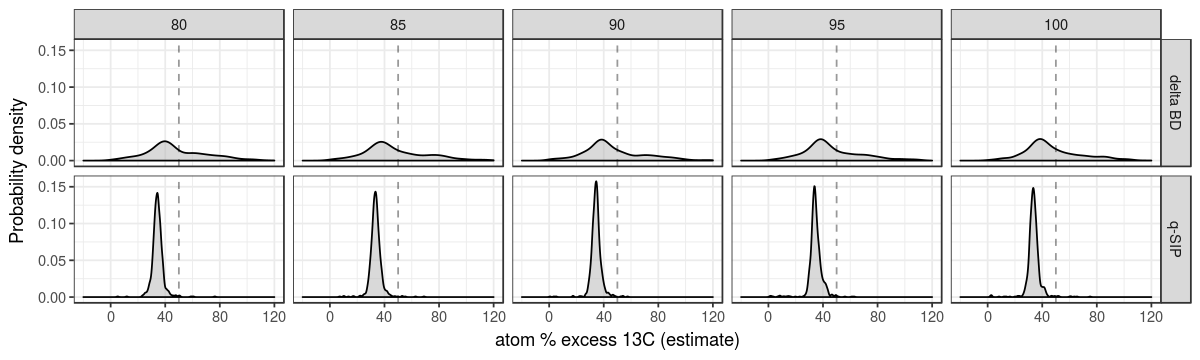

In [45]:
# for vline
df_j = rbind(tmp_atomX, tmp_dBD)

tmp = df_j %>%
    distinct(shared_perc, method, .keep_all=TRUE) %>%
    mutate(true_atom_perc_excess = true_atom_perc_excess %>% as.character %>% as.numeric)

# plotting
options(repr.plot.width=10, repr.plot.height=3)
p_dens_true = ggplot(df_j, aes(atom_perc_excess)) +
    geom_density(alpha=0.5, fill='grey70') +
    geom_vline(data=tmp, aes(xintercept=true_atom_perc_excess), linetype='dashed', alpha=0.4) +
    scale_x_continuous(limits=c(-20, 120)) +
    labs(x='atom % excess 13C (estimate)', y='Probability density') +
    facet_grid(method ~ shared_perc) +
    theme_bw() 

plot(p_dens_true)

# Truth-v-Est + Density

Warning message:
“Removed 66 rows containing non-finite values (stat_density).”

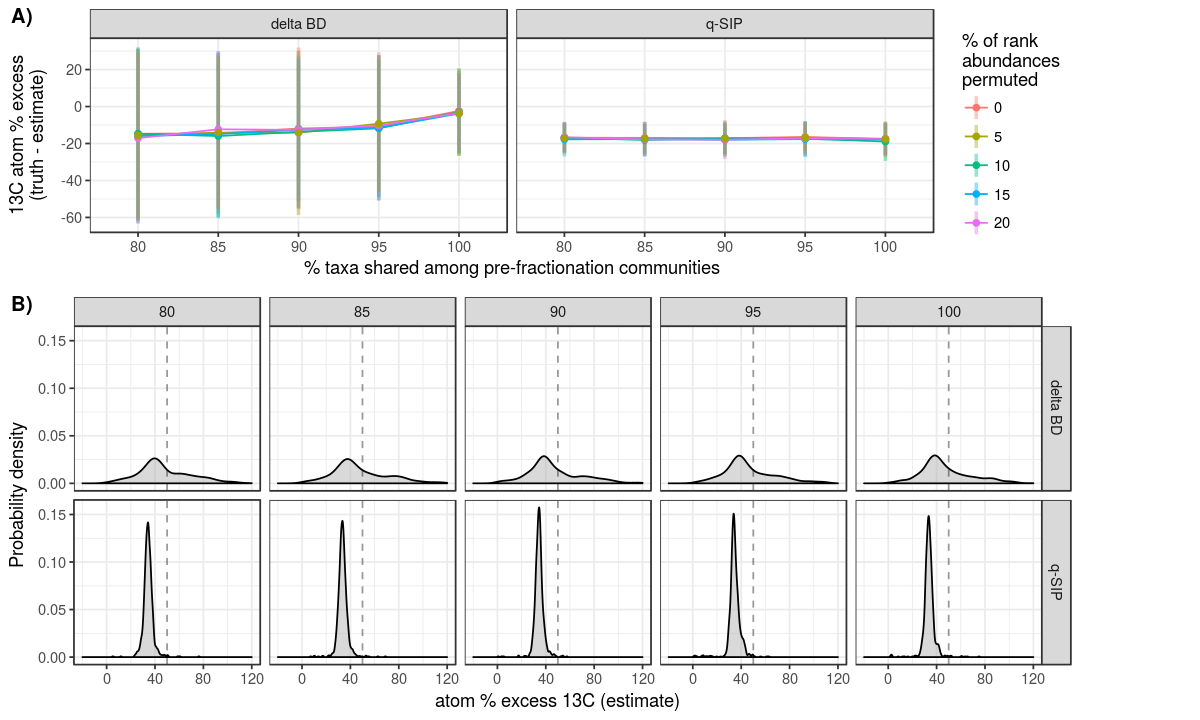

In [52]:
options(repr.plot.width=10, repr.plot.height=6)
p_TE_dens_true = cowplot::ggdraw() +
    cowplot::draw_plot(p_BDshift_true, 0, 0.6, 0.90, 0.4) +
    cowplot::draw_plot(p_dens_true, 0, 0, 0.9, 0.6) +
    cowplot::draw_plot_label(c('A)', 'B)'), c(0, 0), c(1, 0.6), size=12)

plot(p_TE_dens_true)

In [56]:
outF = file.path(workDir, 'microBetaDiv_BDshift-dens.pdf')
ggsave(outF, p_TE_dens_true, width=10, height=5.5)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/microBetaDiv//microBetaDiv_BDshift-dens.pdf 


In [57]:
outF = file.path(workDir, 'microBetaDiv_BDshift-dens.jpeg')
ggsave(outF, p_TE_dens_true, width=10, height=5.5)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/microBetaDiv//microBetaDiv_BDshift-dens.jpeg 


### Plotting results

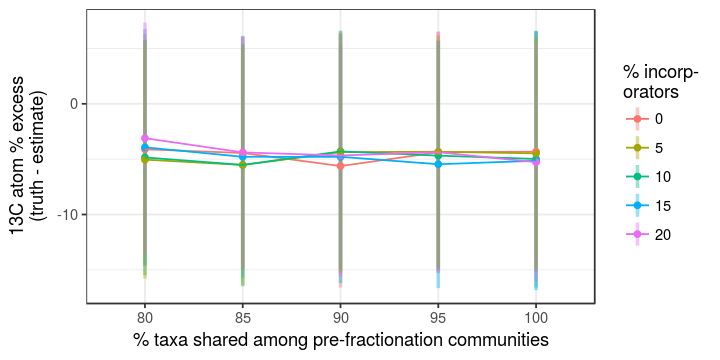

In [94]:
# difference between true and estimated

## q-SIP incorporators 
df.j.dis.qSIP = df.j %>%
    filter(atom_CI_low > 0) %>%     # just incorporators identified by q-SIP
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100) %>%
    group_by(shared_perc, perm_perc) %>%
    summarize(mean_delta_excess = mean(delta_excess),
              sd_delta_excess = sd(delta_excess)) %>%
    ungroup() %>%
    mutate(shared_perc = shared_perc %>% reorder(shared_perc %>% as.numeric),
           perm_perc = perm_perc %>% reorder(perm_perc %>% as.numeric))
   
# plotting
options(repr.plot.width=6, repr.plot.height=3)
p_qSIP = ggplot(df.j.dis.qSIP, aes(shared_perc, mean_delta_excess, 
                      color=perm_perc, group=perm_perc,
                      ymin=mean_delta_excess-sd_delta_excess,
                     ymax=mean_delta_excess+sd_delta_excess)) +
    geom_linerange(alpha=0.4, size=1) +    
    geom_point() +
    geom_line() +
    #facet_grid(true_incorporator ~ .) +
    scale_color_discrete('% incorp-\norators') +
    labs(x='% taxa shared among pre-fractionation communities', 
         y='13C atom % excess\n(truth - estimate)') +
    theme_bw() 

p_qSIP

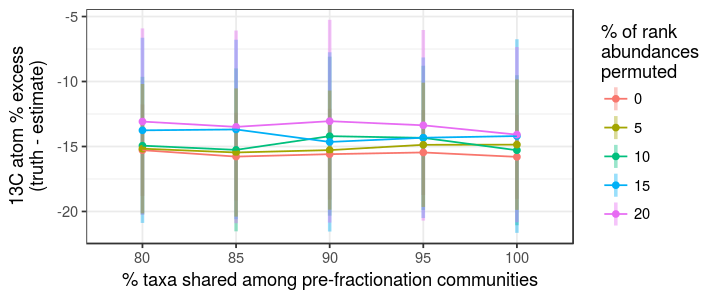

In [95]:
# difference between true and estimated

## q-SIP incorporators 
df.j.dis.qSIP = df.j %>%
    filter(atom_CI_low > 0) %>%     # just incorporators identified by q-SIP
    filter(HWHRSIP_incorp == TRUE) %>%    # just MW-HR-SIP incorporators 
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100) %>%
    group_by(shared_perc, perm_perc) %>%
    summarize(mean_delta_excess = mean(delta_excess),
              sd_delta_excess = sd(delta_excess)) %>%
    ungroup() %>%
    mutate(shared_perc = shared_perc %>% reorder(shared_perc %>% as.numeric),
           perm_perc = perm_perc %>% reorder(perm_perc %>% as.numeric))
   
# plotting
options(repr.plot.width=6, repr.plot.height=2.5)
p_qSIP = ggplot(df.j.dis.qSIP, aes(shared_perc, mean_delta_excess, 
                      color=perm_perc, group=perm_perc,
                      ymin=mean_delta_excess-sd_delta_excess,
                     ymax=mean_delta_excess+sd_delta_excess)) +
    geom_linerange(alpha=0.4, size=1) +    
    geom_point() +
    geom_line() +
    #facet_grid(true_incorporator ~ .) +
    scale_color_discrete('% of rank\nabundances\npermuted') +
    labs(x='% taxa shared among pre-fractionation communities', 
         y='13C atom % excess\n(truth - estimate)') +
    theme_bw() 

p_qSIP

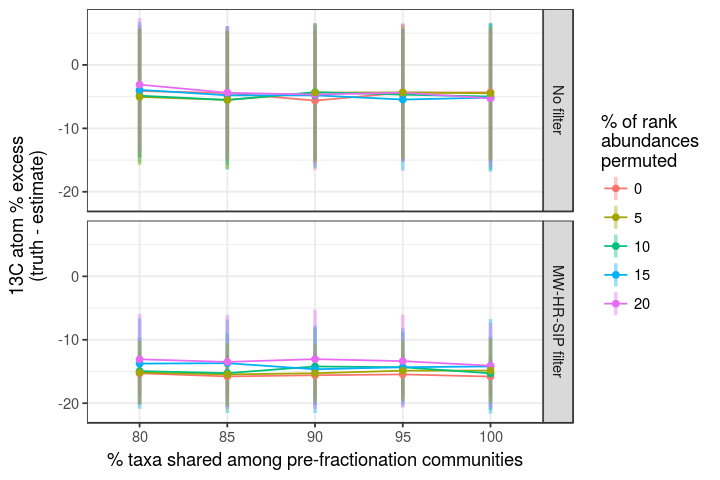

In [96]:
# difference between true and estimated
## q-SIP incorporators 
tmp1 = df.j %>%
    filter(atom_CI_low > 0) %>%     # just incorporators identified by q-SIP
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100) %>%
    group_by(shared_perc, perm_perc) %>%
    summarize(mean_delta_excess = mean(delta_excess),
              sd_delta_excess = sd(delta_excess)) %>%
    ungroup() %>%
    mutate(shared_perc = shared_perc %>% reorder(shared_perc %>% as.numeric),
           perm_perc = perm_perc %>% reorder(perm_perc %>% as.numeric),
           incorp_called = 'No filter')
## MW-HR-SIP incorporators
tmp2 = df.j %>%
    filter(atom_CI_low > 0) %>%     # just incorporators identified by q-SIP
    filter(HWHRSIP_incorp == TRUE) %>%    # just MW-HR-SIP incorporators 
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100) %>%
    group_by(shared_perc, perm_perc) %>%
    summarize(mean_delta_excess = mean(delta_excess),
              sd_delta_excess = sd(delta_excess)) %>%
    ungroup() %>%
    mutate(shared_perc = shared_perc %>% reorder(shared_perc %>% as.numeric),
           perm_perc = perm_perc %>% reorder(perm_perc %>% as.numeric),
           incorp_called = 'MW-HR-SIP filter')

# combining tables
df.j.dis.qSIP = rbind(tmp1, tmp2) %>%
    mutate(incorp_called = factor(incorp_called, levels=c('No filter', 'MW-HR-SIP filter')))

   
# plotting
options(repr.plot.width=6, repr.plot.height=4)
p_qSIP = ggplot(df.j.dis.qSIP, aes(shared_perc, mean_delta_excess, 
                      color=perm_perc, group=perm_perc,
                      ymin=mean_delta_excess-sd_delta_excess,
                     ymax=mean_delta_excess+sd_delta_excess)) +
    geom_line() +
    geom_linerange(alpha=0.4, size=1) +    
    geom_point() +
    facet_grid(incorp_called ~ .) +
    scale_color_discrete('% of rank\nabundances\npermuted') +
    labs(x='% taxa shared among pre-fractionation communities', 
         y='13C atom % excess\n(truth - estimate)') +
    theme_bw() 

p_qSIP

## delta-BD

In [97]:
dBD_files = list.files(path=workDir, pattern='*_dBD.txt', full.names=TRUE, recursive=TRUE)
dBD_files %>% length %>% print

[1] 250


In [98]:
df_dBD = list()
for(F in dBD_files){
    tmp = read.delim(F, sep='\t') 
    FF = strsplit(F, '/') %>% unlist
    FFl = length(FF)
    tmp$shared_perc = FF[FFl-3]
    tmp$perm_perc = FF[FFl-2]
    tmp$rep = FF[FFl-1]
    tmp$file = FF[FFl]
    df_dBD[[F]] = tmp
}

df_dBD = do.call(rbind, df_dBD)
rownames(df_dBD) = 1:nrow(df_dBD)
df_dBD %>% head(n=3) %>% print

                                 taxon mean_CM_control mean_CM_treatment
1       Acaryochloris_marina_MBIC11017        1.729906          1.706919
2 Acetobacter_pasteurianus_IFO_3283-03        1.721156          1.721987
3       Acetobacterium_woodii_DSM_1030        1.714703          1.709346
  stdev_CM_control stdev_CM_treatment      delta_BD shared_perc perm_perc rep
1      0.020665026       0.0021992188 -0.0229868245         100         0   1
2      0.002170362       0.0092936484  0.0008304907         100         0   1
3      0.001507780       0.0005208017 -0.0053571403         100         0   1
                        file
1 OTU_abs1e9_PCR_sub_dBD.txt
2 OTU_abs1e9_PCR_sub_dBD.txt
3 OTU_abs1e9_PCR_sub_dBD.txt


### Joining estimate with truth

In [99]:
df.j = inner_join(df_dBD, df_shift, c('taxon' = 'taxon',
                                       'shared_perc'='shared_perc',
                                       'perm_perc'='perm_perc',
                                       'rep'='rep')) %>%
    filter(!is.na(delta_BD)) %>%
    mutate(true_incorporator = ifelse(median_true_BD_shift > 0.002, TRUE, FALSE),
           true_atom_fraction_excess = median_true_BD_shift / 0.036,
           atom_fraction_excess = delta_BD / 0.036)
df.j %>% head(n=3)

Warning message in inner_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factors with different levels, coercing to character vector”

,taxon,mean_CM_control,mean_CM_treatment,stdev_CM_control,stdev_CM_treatment,delta_BD,shared_perc,perm_perc,rep,file,median_true_BD_shift,true_incorporator,true_atom_fraction_excess,atom_fraction_excess
1,Acaryochloris_marina_MBIC11017,1.729906072,1.7069192475,0.0206650261538,0.00219921880986,-0.0229868244981,100,0,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,-0.638522902725
2,Acetobacter_pasteurianus_IFO_3283-03,1.72115641726,1.72198690793,0.00217036246995,0.00929364841039,0.000830490670569,100,0,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,0.0230691852935833
3,Acetobacterium_woodii_DSM_1030,1.71470324574,1.70934610548,0.00150778021095,0.000520801727452,-0.00535714026073,100,0,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,-0.148809451686944


### Joining with MW-HR-SIP

In [100]:
df.j = left_join(df.j, df_incorp, c('taxon' = 'taxon',
                                    'shared_perc'='shared_perc',
                                    'perm_perc'='perm_perc',
                                    'rep'='rep')) %>%
    mutate(HWHRSIP_incorp = ifelse(is.na(HWHRSIP_incorp), FALSE, TRUE))

df.j %>% nrow %>% print
df.j %>% head(n=3)

Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factor and character vector, coercing into character vector”

[1] 265350


,taxon,mean_CM_control,mean_CM_treatment,stdev_CM_control,stdev_CM_treatment,delta_BD,shared_perc,perm_perc,rep,file,median_true_BD_shift,true_incorporator,true_atom_fraction_excess,atom_fraction_excess,HWHRSIP_incorp
1,Acaryochloris_marina_MBIC11017,1.729906072,1.7069192475,0.0206650261538,0.00219921880986,-0.0229868244981,100,0,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,-0.638522902725,FALSE
2,Acetobacter_pasteurianus_IFO_3283-03,1.72115641726,1.72198690793,0.00217036246995,0.00929364841039,0.000830490670569,100,0,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,0.0230691852935833,FALSE
3,Acetobacterium_woodii_DSM_1030,1.71470324574,1.70934610548,0.00150778021095,0.000520801727452,-0.00535714026073,100,0,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,-0.148809451686944,FALSE


### Plotting results

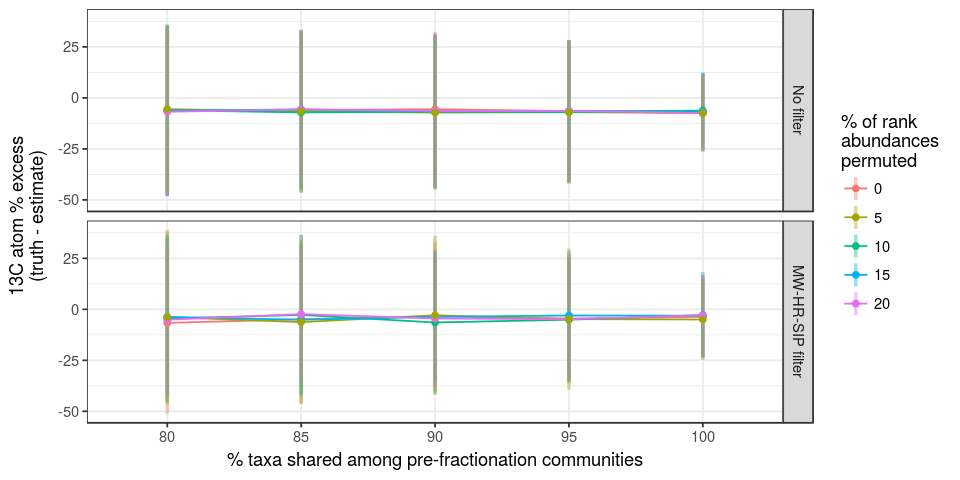

In [101]:
# difference between true and estimated
tmp1 = df.j %>%
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100) %>%
    group_by(shared_perc, perm_perc) %>%
    summarize(mean_delta_excess = mean(delta_excess),
              sd_delta_excess = sd(delta_excess)) %>%
    ungroup() %>%
    mutate(shared_perc = shared_perc %>% reorder(shared_perc %>% as.numeric),
           perm_perc = perm_perc %>% reorder(perm_perc %>% as.numeric),
           incorp_called = 'No filter')

tmp2 = df.j %>%
    filter(HWHRSIP_incorp == TRUE) %>%    # just MW-HR-SIP incorporators 
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100) %>%
    group_by(shared_perc, perm_perc) %>%
    summarize(mean_delta_excess = mean(delta_excess),
              sd_delta_excess = sd(delta_excess)) %>%
    ungroup() %>%
    mutate(shared_perc = shared_perc %>% reorder(shared_perc %>% as.numeric),
           perm_perc = perm_perc %>% reorder(perm_perc %>% as.numeric),
           incorp_called = 'MW-HR-SIP filter')

   
# combining tables
df.j.dis.dBD = rbind(tmp1, tmp2) %>%
    mutate(incorp_called = factor(incorp_called, levels=c('No filter', 'MW-HR-SIP filter')))


# plotting
options(repr.plot.width=8, repr.plot.height=4)
p_dBD = ggplot(df.j.dis.dBD, aes(shared_perc, mean_delta_excess, 
                      color=perm_perc, group=perm_perc,
                      ymin=mean_delta_excess-sd_delta_excess,
                     ymax=mean_delta_excess+sd_delta_excess)) +
    geom_line() +
    geom_linerange(alpha=0.4, size=1) +    
    geom_point() +
    facet_grid(incorp_called ~ .) +
    scale_color_discrete('% of rank\nabundances\npermuted') +
    labs(x='% taxa shared among pre-fractionation communities', 
         y='13C atom % excess\n(truth - estimate)') +
    theme_bw() 

p_dBD 

## Combined plot

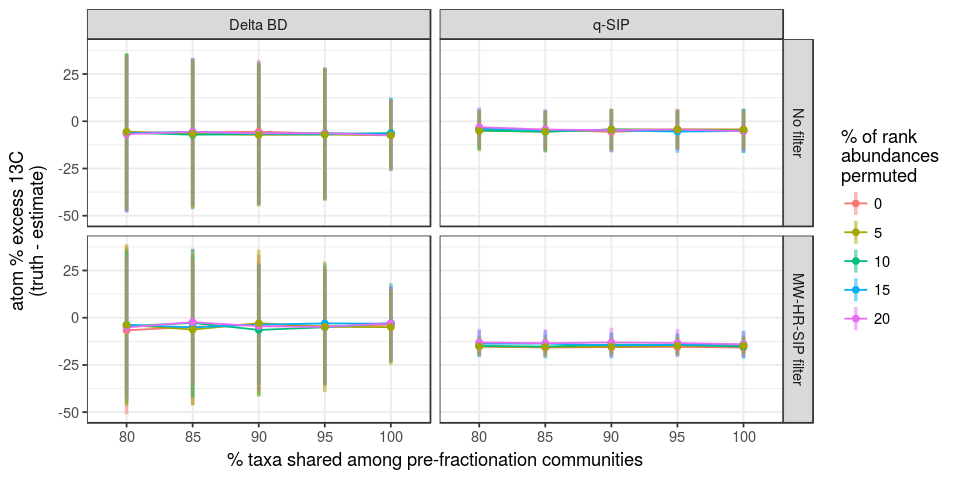

In [102]:
df.jj = rbind(df.j.dis.qSIP %>% mutate(method='qSIP'),
              df.j.dis.dBD %>% mutate(method='Delta BD')) %>%
    mutate(method = gsub('qSIP', 'q-SIP', method))


p.comb = ggplot(df.jj, aes(shared_perc, mean_delta_excess, 
                      color=perm_perc, group=perm_perc,
                      ymin=mean_delta_excess-sd_delta_excess,
                     ymax=mean_delta_excess+sd_delta_excess)) +
    geom_line() +
    geom_linerange(alpha=0.5, size=1) +
    geom_point() +
    scale_color_discrete('% of rank\nabundances\npermuted') +
    labs(x='% taxa shared among pre-fractionation communities', 
         y='atom % excess 13C\n(truth - estimate)') +
    facet_grid(incorp_called ~ method) +
    theme_bw() 
p.comb

In [103]:
outF = file.path(workDir, 'microBetaDiv_BDshift.pdf')
ggsave(outF, p.comb, width=8, height=4)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/microBetaDiv//microBetaDiv_BDshift.pdf 


In [104]:
outF = file.path(workDir, 'microBetaDiv_BDshift.jpeg')
ggsave(outF, p.comb, width=8, height=4)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/microBetaDiv//microBetaDiv_BDshift.jpeg 
